In [7]:
library("plot3D")
library("gsl")

nlon = 100;    # number of longitude points
nlat = 100;    # number of latitude points

phi = seq(0,2*pi,length=nlon);
theta = seq(0,pi,length=nlat);

coord = expand.grid(phi,theta);  
x = sin(coord[,2])*cos(coord[,1]);
y = sin(coord[,2])*sin(coord[,1]);
z = cos(coord[,2]);
num = length(x);
# print(num);  

In [8]:
Ntrunc = 50;     # Number of terms in the expansion
suma = array(dim=c(num,1),0);
for(n in 0:Ntrunc){
 
  bn = 1/(n^2+0.1);  #power spectrum
#  print(n)
  fact = sqrt(bn) ; 

  suma  <-  suma  +  fact*rnorm(1,0,1)*legendre_sphPlm(n,0,cos(coord[,2]))  ;
  
     if(n>0){
        for(j in 1:n){
           ynm = legendre_sphPlm(n,j,cos(coord[,2])) * ( rnorm(1,0,sd=1) * cos(j*coord[,1]) +
                                                         rnorm(1,0,sd=1) * sin(j*coord[,1])  );
           suma <- suma +  fact*sqrt(2)* ynm;
        }
     }
}

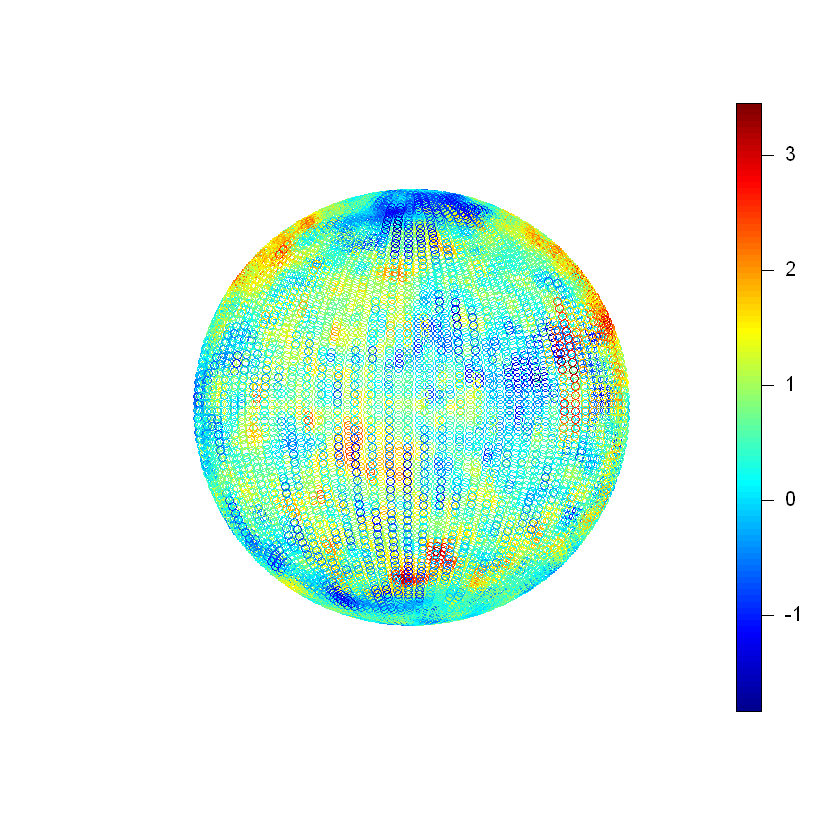

In [9]:
scatter3D(x,y,z,colvar=suma,theta=0,phi=0,box=F);  # realization plot